<a href="https://colab.research.google.com/github/ejini6969/Optimization-Deep-Learning-ODL-/blob/main/DNN_CNN_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DNN - Cifar 10
 
# Exercise
Conduct the the analysis using DNN model for Cifar 10 dataset. Then, conduct the model tuning to improve the performance

https://keras.io/api/datasets/cifar10/

In [43]:
import keras
from keras.datasets import cifar10

cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [77]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [78]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Flattening the images from the 28x28 pixels to 784 pixels
X_train = X_train.reshape(50000, 32*32*3)
X_test = X_test.reshape(10000, 32*32*3)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [79]:
# range of pixel between 0 - 255

# normalizing the dataset to help with training
X_train /= 255
X_test /= 255

In [80]:
X_train[1]

array([0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
       0.5647059 ], dtype=float32)

In [81]:
# One-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print("Shape before one-hot encoding: ", y_train.shape)
print("Shape after one-hot encoding: ", Y_train.shape)

# 0 - 9 added after one-hot encoding
     

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [71]:
# Building a linear stack of layers with the sequential model

L1 = 1000
L2 = 500
L3 = 250

# this uses grey scale, if RGB (colored) image, input_dim must be 28 * 28 * 3
model = Sequential()
model.add(Dense(L1, input_dim = 32 * 32 * 3, activation = 'relu'))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))
     

In [72]:
# Output layer (Softmax = multinominal)
model.add(Dense(10, activation = 'softmax')) # has 10 categorial vales (0 - 9)

In [73]:
# compiling the sequential model
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [53]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/10
500/500 [==============================] - 35s 67ms/step - loss: 1.9058 - accuracy: 0.3147 - val_loss: 1.7590 - val_accuracy: 0.3614
Epoch 2/10
500/500 [==============================] - 33s 66ms/step - loss: 1.6797 - accuracy: 0.3978 - val_loss: 1.6689 - val_accuracy: 0.3950
Epoch 3/10
500/500 [==============================] - 33s 66ms/step - loss: 1.5762 - accuracy: 0.4328 - val_loss: 1.5327 - val_accuracy: 0.4535
Epoch 4/10
500/500 [==============================] - 33s 66ms/step - loss: 1.5194 - accuracy: 0.4559 - val_loss: 1.5502 - val_accuracy: 0.4555
Epoch 5/10
500/500 [==============================] - 33s 67ms/step - loss: 1.4750 - accuracy: 0.4722 - val_loss: 1.5120 - val_accuracy: 0.4687
Epoch 6/10
500/500 [==============================] - 33s 66ms/step - loss: 1.4405 - accuracy: 0.4848 - val_loss: 1.4554 - val_accuracy: 0.4787
Epoch 7/10
500/500 [==============================] - 32s 64ms/step - loss: 1.3999 - accuracy: 0.4983 - val_loss: 1.4231 - val_accuracy:

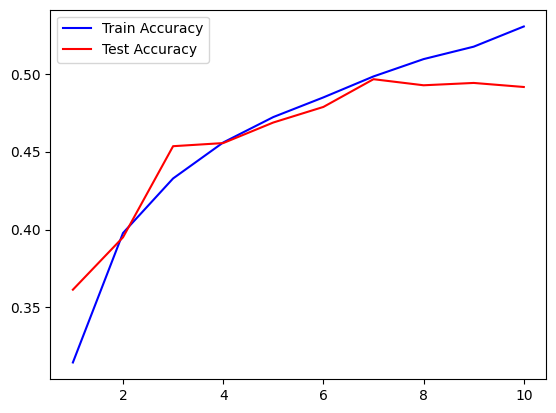

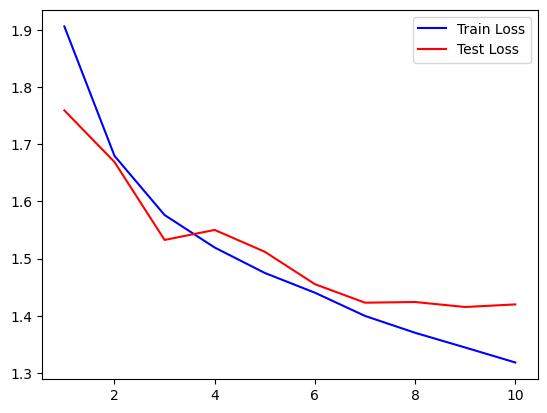

In [54]:
import matplotlib.pyplot as plt

acc2 = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss2 = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc2, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label= 'Test Loss')
plt.legend()
plt.show()

In [ ]:
# preferable to use maxpooling 3D; convo3D for videos, maxpooling2D; convo2D for image dataset, maxpooling 1D; convo1D for house price dataset (continuous)
# dropout rate can be < 0.5

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [58]:
# no reshape

# convert from integers to floats
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# normalizing the dataset to help with training
X_train /= 255
X_test /= 255

# One-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print("Shape before one-hot encoding: ", y_train.shape)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [59]:
l1 = 16
l2 = 32
l3 = 64

model = Sequential()
model.add(Conv2D(l1, (3, 3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same')) # 16 neurons
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(l2, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(l3, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(10, activation = 'softmax'))

In [60]:
# compiling the sequential model
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [61]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/10
600/600 [==============================] - 40s 65ms/step - loss: 0.4414 - accuracy: 0.8622 - val_loss: 0.0843 - val_accuracy: 0.9718
Epoch 2/10
600/600 [==============================] - 37s 62ms/step - loss: 0.1734 - accuracy: 0.9485 - val_loss: 0.0529 - val_accuracy: 0.9829
Epoch 3/10
600/600 [==============================] - 37s 61ms/step - loss: 0.1353 - accuracy: 0.9601 - val_loss: 0.0429 - val_accuracy: 0.9857
Epoch 4/10
600/600 [==============================] - 36s 60ms/step - loss: 0.1096 - accuracy: 0.9675 - val_loss: 0.0413 - val_accuracy: 0.9859
Epoch 5/10
600/600 [==============================] - 37s 62ms/step - loss: 0.0949 - accuracy: 0.9714 - val_loss: 0.0387 - val_accuracy: 0.9863
Epoch 6/10
600/600 [==============================] - 37s 62ms/step - loss: 0.0853 - accuracy: 0.9738 - val_loss: 0.0384 - val_accuracy: 0.9877
Epoch 7/10
600/600 [==============================] - 37s 62ms/step - loss: 0.0747 - accuracy: 0.9773 - val_loss: 0.0349 - val_accuracy: